In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
filenames = ['../databases/FIA.csv', '../databases/FA.csv', '../databases/FCEN.csv']

df = pd.concat([pd.read_csv(f) for f in filenames])


for col in df.columns:
    df[col] = df[col].fillna(method='ffill')
    
df.head()

,Código Hermes,Código Colciencias,Nombre del grupo,Lider colciencias,Lider Hermes,Integrantes Hermes,Integrantes Colciencias,Categoría (Conv 693 de Colciencias 2014),Categoría (Conv 737 de Colciencias 2015),Categoría (Conv 781 de Colciencias 2017),...,Area_OCDE,Agenda del Conocimiento,Sede,Facultad,Departamento,Correo,Sedes_Int,Lider Colciencias,Categoría (Conv 737 de Colciencias 2015),Categoría (Conv 833 de Colciencias 2019)
0,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ALBERTO SEPULVEDA GIRALDO,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales.",NaN,NaN,NaN
1,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ALEJANDRO GIRALDO ORTIZ,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales.",NaN,NaN,NaN
2,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ANDERSON ALBERTO RUALES TORRES,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales.",NaN,NaN,NaN
3,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ANDRES DAVID TOBAR RODRIGUEZ,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales.",NaN,NaN,NaN
4,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ANDRES EDUARDO CASTRO OSPINA,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales.",NaN,NaN,NaN


In [31]:
set([sede.strip() for sede in ','.join(np.unique(df['Sedes_Int']).tolist()).split(',')])

{'Bogotá', 'Manizales', 'Manizales.', 'Medellín', 'Orinoquía', 'Palmira'}

In [3]:
ids = np.unique(df['Nombre del grupo'].tolist())

In [4]:
get_name = lambda df,g:df[df['Nombre del grupo'] == g]['Nombre del grupo'].tolist()[0]
get_members = lambda df,g:df[df['Nombre del grupo'] == g]
# get_line = lambda df,g:df[df['Nombre del grupo'] == g]['Lineas de Investigación'].tolist()[0]
get_sub_OCDE = lambda df,g:df[df['Nombre del grupo'] == g]['Area_Conocimiento_OCDE'].tolist()[0]
get_OCDE = lambda df,g:df[df['Nombre del grupo'] == g]['Area_OCDE'].tolist()[0]
get_know = lambda df,g:df[df['Nombre del grupo'] == g]['Agenda del Conocimiento'].tolist()[0]
get_facultad = lambda df,g:df[df['Nombre del grupo'] == g]['Facultad'].tolist()[0]
get_departamento = lambda df,g:df[df['Nombre del grupo'] == g]['Departamento'].tolist()[0]

In [5]:
groups = {}
for group in ids:
    groups.setdefault('members', []).append(len(get_members(df, group)))
    groups.setdefault('name', []).append(get_name(df, group).capitalize())
    # groups.setdefault('line', []).append(get_line(df, group).capitalize())
    groups.setdefault('sub_ocde', []).append(get_sub_OCDE(df, group).capitalize())
    groups.setdefault('ocde', []).append(get_OCDE(df, group).capitalize())
    groups.setdefault('knowledge', []).append(get_know(df, group).capitalize())
    groups.setdefault('facultad', []).append(get_facultad(df, group).replace('4- ', '').capitalize())
    groups.setdefault('departamento', []).append(get_departamento(df, group).replace('4- ', '').capitalize())

groups = pd.DataFrame.from_dict(groups)
groups['knowledge'].replace('Cyt de minerales y materiales', 'Ciencia y tecnología de minerales y materiales', inplace=True)
# groups['facultad'].replace('4- ', '', inplace=True)
groups.head()

,members,name,sub_ocde,ocde,knowledge,facultad,departamento
0,11,Abc dynamics,Ingeniería civil,Ingeniería y tecnología,Desarrollo organizacional económico e industrial,Facultad de ciencias exactas y naturales,Departamento de matemáticas
1,13,Analisis matematico am,Ingeniería civil,Metemáticas,Desarrollo organizacional económico e industrial,Facultad de ciencias exactas y naturales,Departamento de matemáticas
2,4,Arquitectura medio ambiente y sostenibilidad,Ciencias de la tierra y medioambientales,Ciencias naturales,Ambiente y biodiversidad,Facultad de ingeniería y arquitectura,Escuela de arquitectura y urbanismo
3,1,Arquitectura y ciudad: ciencia y cultura,Humanidades,Arte,Arte y cultura,Facultad de ingeniería y arquitectura,Escuela de arquitectura y urbanismo
4,1,"Arquitectura, ciudad y territorio",Humanidades,Arte,Arte y cultura,Facultad de ingeniería y arquitectura,Escuela de arquitectura y urbanismo


In [9]:
import json

In [33]:
data = json.dumps({
    'grupos': np.unique(df['Nombre del grupo'].tolist()).tolist(),
    'facultades': np.unique(groups['facultad'].tolist()).tolist(),
    'departamentos': np.unique(groups['departamento'].tolist()).tolist(),
    'sedes_int': list(set([sede.strip(' ,.') for sede in ','.join(np.unique(df['Sedes_Int']).tolist()).split(',')])),

})

data = json.loads(data)
data

{'grupos': ['ABC DYNAMICS',
  'ANALISIS MATEMATICO AM',
  'ARQUITECTURA MEDIO AMBIENTE Y SOSTENIBILIDAD',
  'ARQUITECTURA Y CIUDAD: CIENCIA Y CULTURA',
  'ARQUITECTURA, CIUDAD Y TERRITORIO',
  'ARQUITECTURA, MEDIOS DE REPRESENTACIÓN Y COMUNICACIÓN',
  'Aplicaciones y enseñanza de las ciencias exactas y naturales',
  'BIOPRODUCTOS',
  'CALCULO CIENTIFICO Y MODELAMIENTO MATEMATICO',
  'COGNICIÓN, LENGUAJE Y CULTURA',
  'COMPETITIVIDAD EMPRESARIAL Y GESTION TECNOLOGICA',
  'COMPUTACION APLICADA SUAVE Y DURA SHAC',
  'CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES',
  'CORPORATE GOVERNANCE TECNOLOGIA Y COMPLEJIDAD',
  'CULTURA DE LA CALIDAD EN LA EDUCACION',
  'CULTURA ORGANIZACIONAL Y GESTION HUMANA',
  'EDUCACIÓN EN CIENCIAS EXACTAS Y NATURALES - EduCEN',
  'EMPRENDIMIENTO EMPRESARIAL',
  'ENVIRONMENTAL ENERGY AND EDUCATION POLICY E3P',
  'ESTUDIOS EN CULTURA Y COMUNICACION ESCULCO',
  'ESTUDIOS REGIONALES CULTURA Y SOCIEDAD',
  'ETICA EMPRESARIAL Y EMPRESARIADO SOCIAL ETHOS',
  'FILOSOFIA Y

In [18]:
len(data["facultades"]), len(data["grupos"]), len(data["departamentos"])

(3, 66, 10)

In [39]:
sum(groups['members'].to_list())

723

In [6]:
for i in ids:
    print(f"""<li><a class="dropdown-item" href="#">{i.capitalize()}</a></li>""")

<li><a class="dropdown-item" href="#">Abc dynamics</a></li>
<li><a class="dropdown-item" href="#">Analisis matematico am</a></li>
<li><a class="dropdown-item" href="#">Arquitectura medio ambiente y sostenibilidad</a></li>
<li><a class="dropdown-item" href="#">Arquitectura y ciudad: ciencia y cultura</a></li>
<li><a class="dropdown-item" href="#">Arquitectura, ciudad y territorio</a></li>
<li><a class="dropdown-item" href="#">Arquitectura, medios de representación y comunicación</a></li>
<li><a class="dropdown-item" href="#">Aplicaciones y enseñanza de las ciencias exactas y naturales</a></li>
<li><a class="dropdown-item" href="#">Bioproductos</a></li>
<li><a class="dropdown-item" href="#">Calculo cientifico y modelamiento matematico</a></li>
<li><a class="dropdown-item" href="#">Cognición, lenguaje y cultura</a></li>
<li><a class="dropdown-item" href="#">Competitividad empresarial y gestion tecnologica</a></li>
<li><a class="dropdown-item" href="#">Computacion aplicada suave y dura sha

In [8]:
np.unique(groups['departamento'].tolist())

array(['Departamento de administración',
       'Departamento de ciencias humanas',
       'Departamento de física y química',
       'Departamento de informática y computación',
       'Departamento de ingeniería civil',
       'Departamento de ingeniería eléctrica, electrónica y computación',
       'Departamento de ingeniería industrial',
       'Departamento de ingeniería química',
       'Departamento de matemáticas',
       'Escuela de arquitectura y urbanismo'], dtype='<U63')

In [391]:
faculty = 'All'
# faculty = 'Facultad de administración'
# faculty = 'Facultad de ciencias exactas y naturales'
# faculty = 'Facultad de ingeniería y arquitectura'

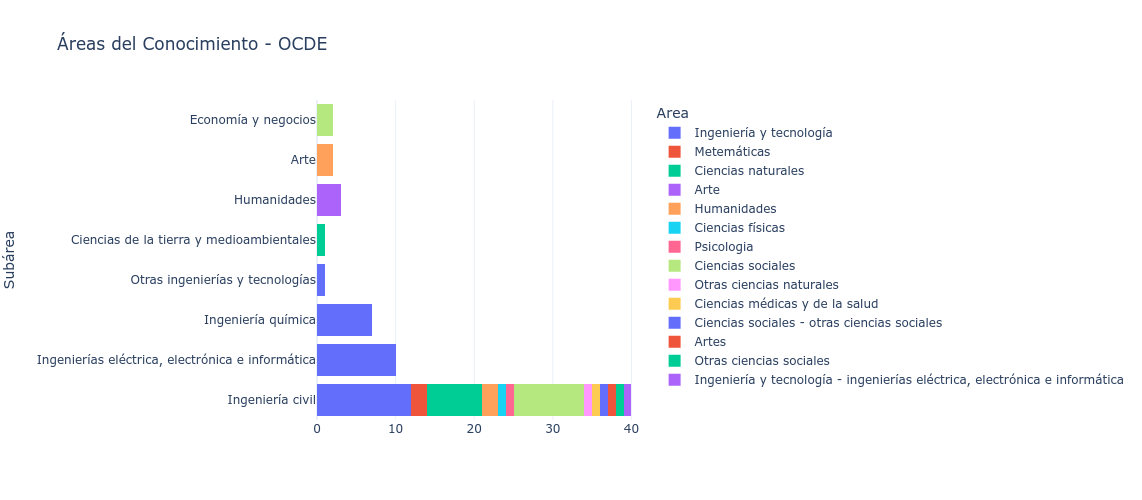

In [379]:
config = {
    'labels': {'ocde': 'Area',
               'sub_ocde': 'Subárea',
               'count': ''
              },
     'height': 500,
     'title':'Áreas del Conocimiento - OCDE',
     'template': 'plotly_white',
}

g = groups.loc[groups['facultad'] == faculty]
if faculty == 'All':
    fig = px.histogram(groups, y='sub_ocde', color='ocde', orientation='h', barmode='stack',  **config)
    
elif faculty in ['Facultad de administración', 'Facultad de ciencias exactas y naturales']:
    config['labels']['ocde'] = ''
    fig = px.histogram(g, y='ocde', orientation='h', barmode='stack',  **config)
else:
    fig = px.histogram(g, y='sub_ocde', color='ocde', orientation='h', barmode='stack',  **config)

fig.update_layout(xaxis_title='')
# fig.update_traces(hoverinfo='none', hovertemplate = '')
fig.show()

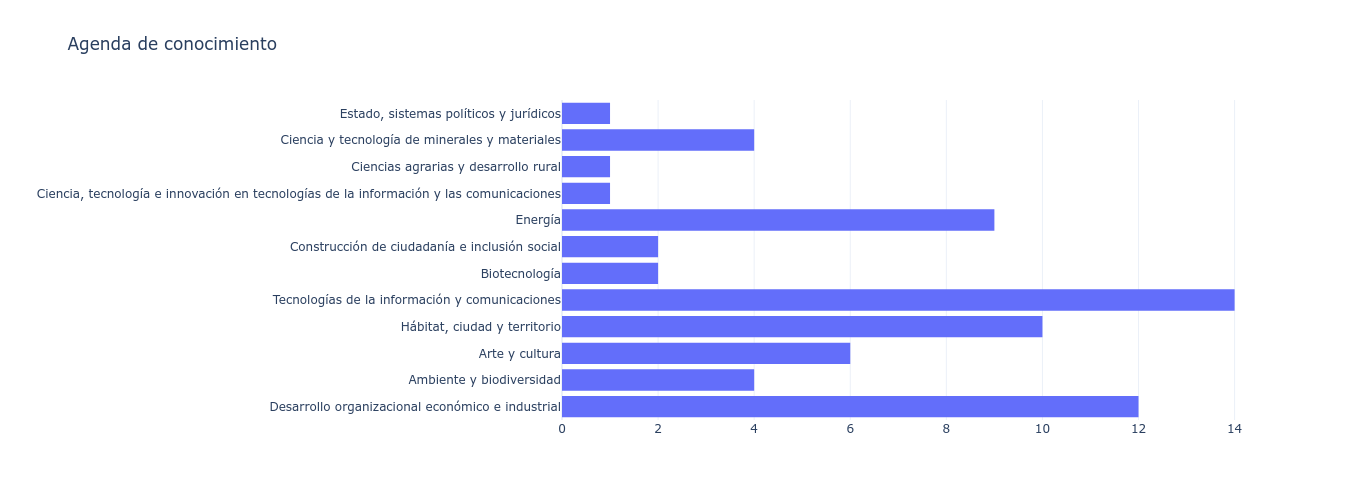

In [380]:
config = {
    'labels': {'knowledge': '',
               'sub_ocde': 'Subáreas',
               'count': ''
              },
     'height': 500,
     'title':'Agenda de conocimiento',
     'template': 'plotly_white',
}

if faculty != 'All':
    g = groups.loc[groups['facultad'] == faculty]
else:
    g = groups

fig = px.histogram(g, y='knowledge', orientation='h', barmode='group', **config)
fig.update_layout(xaxis_title='')
fig.update_traces(hoverinfo='none', hovertemplate = '')
fig.show()

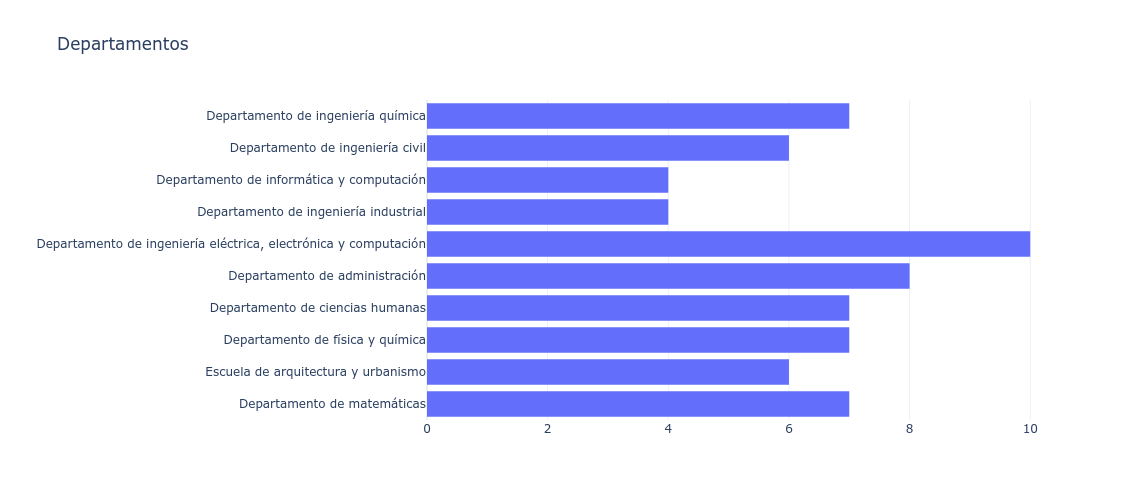

In [381]:
config = {
    'labels': {'departamento': '',
               'sub_ocde': 'Subáreas',
               'count': ''
              },
     'height': 500,
     'title':'Departamentos',
     'template': 'plotly_white',
}

if faculty != 'All':
    g = groups.loc[groups['facultad'] == faculty]
else:
    g = groups

fig = px.histogram(g, y='departamento', orientation='h', barmode='group', **config)
fig.update_layout(xaxis_title='')
fig.update_traces(hoverinfo='none', hovertemplate = '')
fig.show()

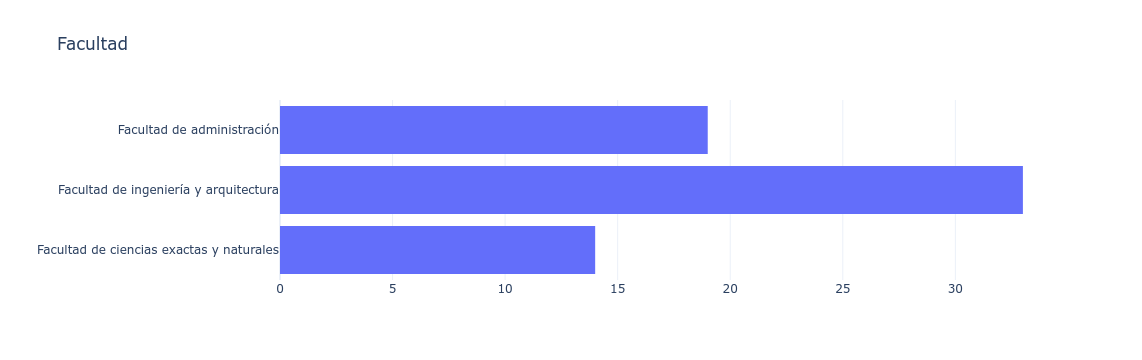

In [392]:
config = {
    'labels': {'facultad': '',
               'sub_ocde': 'Subáreas',
               'count': ''
              },
     'height': 200,
     'title':'Facultad',
     'template': 'plotly_white',
}

if faculty != 'All':
    g = groups.loc[groups['facultad'] == faculty]
else:
    g = groups

if np.unique(g['facultad']).size > 1:
    fig = px.histogram(g, y='facultad', orientation='h', barmode='group', **config)
    fig.update_layout(xaxis_title='')
    fig.update_traces(hoverinfo='none', hovertemplate = '')
    fig.show()

In [383]:
np.unique(g['facultad']).size

3